In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib as plt


In [3]:
diabetes =pd.read_csv("C:\cit\cit vee\semester 4\ml lab\diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


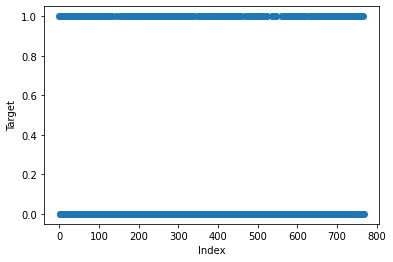

In [9]:
#for visualizing the target feature values
import matplotlib.pyplot as plt

target_indices = list(range(len(diabetes['Outcome'])))
plt.scatter(target_indices, diabetes['Outcome'])
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()

In [11]:
#class imbalancy check
count0=0
count1=0
for i in diabetes['Outcome']:
 if i==1:
  count1=count1+1
 else:
  count0=count0+1
print("no of os are",count0)
print("no of 1s are",count1)




no of os are 500
no of 1s are 268


In [61]:
x =diabetes.drop('Outcome',axis=1)
y =diabetes[['Outcome']]

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.3,random_state=1)


In [91]:
#model 1 decision tree
modeldt=DecisionTreeClassifier(criterion = 'gini',max_depth=3)
dtmodel=modeldt.fit(x_train,y_train)
y_preddt=dtmodel.predict(x_test)
dtmodel.score(x_train,y_train)

0.7635009310986964

In [92]:
#testing acc of dt
acc=accuracy_score(y_test, y_preddt)
acc

0.7575757575757576

In [93]:
#adaboost model
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7783985102420856

In [94]:
ab.score(x_test,y_test)

0.7662337662337663

In [95]:
#model lr
LR=LogisticRegression()
LR=LR.fit(x_train, y_train)
y_pred1 = LR.predict(x_test)


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
LR.score(x_test,y_test)

0.7835497835497836

In [97]:
LR.score(x_train,y_train)

0.7728119180633147

In [98]:
#svm model 
from sklearn import svm


In [99]:
svc = svm.SVC(kernel='linear') # Linear Kernel


In [100]:
svc.fit(x_train, y_train)


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [101]:
y_pred = svc.predict(x_test)


In [102]:
svc.score(x_train,y_train)

0.7802607076350093

In [103]:
svc.score(x_test,y_pred)

1.0

In [104]:
#as svc is overfitting we go for bagging

from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=svc, n_estimators=10, random_state=0)
bc.fit(x_train,y_train)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=SVC(kernel='linear'), random_state=0)

In [105]:
bc.score(x_train,y_train)

0.7839851024208566

In [106]:
bc.score(x_test,y_test)

0.8008658008658008

In [107]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

Best Cross validation score: 0.77
Best parameters:  {'C': 10, 'solver': 'newton-cg'}


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when

In [108]:
grid.score(x_test,y_test)

0.7835497835497836

In [ ]:
# pickling the model bc is 80% accurate others are: dt 75 , ab 76 , lr 78 .

In [109]:
pickle.dump(bc,open('model_diabetes.pkl','wb'))
model = pickle.load(open('model_diabetes.pkl','rb'))

In [110]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [113]:
def classify(num):
    if num<1:
        return 'negative'
    else:
        return 'positive'

In [114]:
import gradio as gr
import numpy as np
def predict_diabetes(preg,glu,bp,st,ins,bmi,dpf,age):
    input_array=np.array([[preg,glu,bp,st,ins,bmi,dpf,age]])
    pred=bc.predict(input_array)
    output=classify(pred[0])
    if output=='negative':
      return [(0,output)]
    else:
      return [(1,output)]

In [115]:
preg = gr.inputs.Slider(minimum=0, maximum=17, default=2, label="Pregnancy")
glu = gr.inputs.Slider(minimum=0, maximum=199, default=2, label="glucose")
bp = gr.inputs.Slider(minimum=0, maximum=122, default=2, label="blood prussure")
st = gr.inputs.Slider(minimum=0, maximum=99, default=2, label="skin thickness")
ins = gr.inputs.Slider(minimum=0, maximum=846, default=2, label="insulin")
bmi = gr.inputs.Slider(minimum=0, maximum=67.1, default=2, label="bmi")
dpf = gr.inputs.Slider(minimum=0, maximum=2.5, default=2, label="diabetes pedigree function")
age = gr.inputs.Slider(minimum=20, maximum=100, default=2, label="age")


op=gr.outputs.HighlightedText(color_map={ "negative": "green",
        "positive": "red",})

gr.Interface(predict_diabetes, inputs=[preg,glu,bp,st,ins,bmi,dpf,age], outputs=op,live=True).launch(share=True)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\inputs.py:88: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\outputs.py:239: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\gradio\components.py:2960: UserWarning: The 'color_map' parameter has been moved from the constructor to `HighlightedText.style()` 
  warnings.warn(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\grad

IMPORTANT: You are using gradio version 3.9, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://af3ffc93c8961df7.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x1626c8656d0>,
 'http://127.0.0.1:7862/',
 'https://af3ffc93c8961df7.gradio.app')